In [68]:
import requests
import re
import json
import pandas as pd
import numpy as np
from itertools import chain
from matplotlib import pyplot as plt

In [77]:
metric_to_principle = {
    "unique_identifier": "findable",
    "metadata_identifier_persistence": "findable",
    "data_identifier_persistence": "findable",
    "structured_metadata": "findable",
    "grounded_metadata": "findable",
    "data_identifier_in_metadata": "findable",
    "metadata_identifier_in_metadata": "findable",
    "searchable": "findable",
    "data_protocol": "accessible",
    "metadata_protocol": "accessible",
    "data_authorization": "accessible",
    "metadata_authorization": "accessible",
    "metadata_persistence": "accessible",
    "metadata_kr_language_weak": "interoperable",
    "metadata_kr_language_strong": "interoperable",
    "data_kr_language_weak": "interoperable",
    "data_kr_language_strong": "interoperable",
    "metadata_uses_fair_vocabularies_weak": "interoperable",
    "metadata_uses_fair_vocabularies_strong": "interoperable",
    "metadata_contains_outward_links": "interoperable",
    "metadata_includes_license_weak": "reusable",
    "metadata_includes_license_strong": "reusable"
}

metrics_ordered = list(metric_to_principle.keys())

In [2]:
def build_result_json(assessment_result):
    if assessment_result is None:
        return None
    content = assessment_result.get("contains")
    result_list = []
    for k in content.keys():
        score_key = "http://semanticscience.org/resource/SIO_000300"
        metric = re.search(r'(?<=https://w3id.org/FAIR_Tests/tests/gen2_).*$', k).group()
        try:
            score = content.get(k)[0].get(score_key)[0].get("@value")
        except AttributeError:
            score = None
        result_dict = {
            "metric": metric,
            "score": score
        }
        result_list.append(result_dict)
    return result_list

In [3]:
def get_assessment(url):
    global count
    print(count)
    print(url)

    api_connection = "https://api.fair-enough.semanticscience.org/evaluations"

    request_body = {
        "subject": url,
        "collection": "fair-evaluator-maturity-indicators"
    }


    response = requests.post(api_connection, json=request_body)

    if response.status_code != 201:
        print(response.status_code)
        print("_______________________________________")
        count += 1
        return None

    if response is None:
        return None

    result = build_result_json(response.json())
    print("_______________________________________")
    count += 1
    return result

In [36]:
def get_metrics_from_result(assessment_result):
    return [item.get('metric') for item in assessment_result]

def get_scores_from_result(assessment_result):
    return [item.get('score') for item in assessment_result]

In [70]:
def print_summary_stats(scores):
    print("Mean: "+str(scores.mean()))
    print("Median: "+str(+scores.median()))
    print("Min: "+str(scores.min()))
    print("Max: "+str(scores.max()))

# Papers

## Papers via DOI

## Papers via ORKG resource URL

## Papers via standard URL

# Comparisons

In [53]:
def expand_comp_df(df):
    df_exp = pd.DataFrame()
    df_exp["comparison"] = list(chain.from_iterable([[x]*22 for x in df["comparisons"]]))
    try:
        df_exp["doi"] = list(chain.from_iterable([[x]*22 for x in df["doi"]]))
    except KeyError:
        pass
    df_exp["metric"] = list(chain.from_iterable([get_metrics_from_result(assessment_result=x) for x in df["assessment_result"]]))
    df_exp["score_earned"] = list(chain.from_iterable([get_scores_from_result(assessment_result=x) for x in df["assessment_result"]]))
    df_exp["score_total"] = list(chain.from_iterable([[1]*22 for x in df["comparisons"]]))
    df_exp = df_exp[["comparison", "doi", "metric", "score_earned", "score_total"]]
    return df_exp

## Comparisons via DOI

In [4]:
%%script false --no-raise-error
comp_doi_df = pd.read_csv("raw_data/comparison_query_result_2023-03-29.csv")
comp_doi_df = comp_doi_df[comp_doi_df["doi"].isna() == False].reset_index(drop=True)
count = 0
comp_doi_df["assessment_result"] = comp_doi_df["doi"].map(lambda x: get_assessment(url="https://doi.org/" + x))
comp_doi_df.to_csv("assessed_data/comparison_doi_df_fenough_assessment.csv")
comp_doi_df

Couldn't find program: 'false'


In [57]:
comp_doi_df = pd.read_csv("assessed_data/comparison_doi_df_fenough_assessment.csv", index_col=0)
comp_doi_df = comp_doi_df[comp_doi_df["assessment_result"].isna() == False].reset_index(drop=True)
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: x.replace("\'", "\""))
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: x.replace("None", "\"None\""))
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: json.loads(x))
comp_doi_df

,comparisons,doi,assessment_result
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,"[{'metric': 'data_kr_language_weak', 'score': ..."
1,http://orkg.org/orkg/resource/R140449,10.48366/r140449,"[{'metric': 'structured_metadata', 'score': '1..."
2,http://orkg.org/orkg/resource/R140463,10.48366/r140463,"[{'metric': 'unique_identifier', 'score': '1'}..."
3,http://orkg.org/orkg/resource/R140465,10.48366/r140465,"[{'metric': 'unique_identifier', 'score': '1'}..."
4,http://orkg.org/orkg/resource/R140714,10.48366/r140714,"[{'metric': 'structured_metadata', 'score': '1..."
...,...,...,...
251,http://orkg.org/orkg/resource/R576870,10.48366/r576870,"[{'metric': 'metadata_identifier_persistence',..."
252,http://orkg.org/orkg/resource/R576872,10.48366/r576872,"[{'metric': 'unique_identifier', 'score': '1'}..."
253,http://orkg.org/orkg/resource/R576873,10.48366/r576873,"[{'metric': 'unique_identifier', 'score': '1'}..."
254,http://orkg.org/orkg/resource/R576874,10.48366/r576874,"[{'metric': 'unique_identifier', 'score': '1'}..."


In [58]:
comp_doi_df_assessed = expand_comp_df(comp_doi_df)
comp_doi_df_assessed[comp_doi_df_assessed["score_earned"] == "None"].value_counts("metric")

metric
data_protocol                             5
metadata_identifier_in_metadata           5
metadata_kr_language_weak                 5
structured_metadata                       4
data_kr_language_strong                   3
metadata_kr_language_strong               3
metadata_uses_fair_vocabularies_strong    3
data_authorization                        2
data_identifier_in_metadata               2
data_kr_language_weak                     2
grounded_metadata                         2
metadata_persistence                      2
metadata_contains_outward_links           1
metadata_includes_license_strong          1
metadata_protocol                         1
metadata_uses_fair_vocabularies_weak      1
dtype: int64

In [59]:
comp_doi_df_assessed["score_earned"] = comp_doi_df_assessed["score_earned"].map(lambda x: x.replace("None", "0"))
comp_doi_df_assessed["score_earned"] = comp_doi_df_assessed["score_earned"].map(lambda x: int(x))
comp_doi_df_assessed

,comparison,doi,metric,score_earned,score_total
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,data_kr_language_weak,0,1
1,http://orkg.org/orkg/resource/R140347,10.48366/r140347,metadata_identifier_persistence,1,1
2,http://orkg.org/orkg/resource/R140347,10.48366/r140347,unique_identifier,1,1
3,http://orkg.org/orkg/resource/R140347,10.48366/r140347,structured_metadata,1,1
4,http://orkg.org/orkg/resource/R140347,10.48366/r140347,grounded_metadata,1,1
...,...,...,...,...,...
5627,http://orkg.org/orkg/resource/R576876,10.48366/r576876,data_kr_language_strong,0,1
5628,http://orkg.org/orkg/resource/R576876,10.48366/r576876,data_identifier_persistence,0,1
5629,http://orkg.org/orkg/resource/R576876,10.48366/r576876,metadata_uses_fair_vocabularies_strong,0,1
5630,http://orkg.org/orkg/resource/R576876,10.48366/r576876,metadata_uses_fair_vocabularies_weak,1,1


In [71]:
comp_doi_df_total = comp_doi_df_assessed.groupby("comparison").agg({"score_earned": "sum"}).reset_index()
print_summary_stats(comp_doi_df_total["score_earned"])

Mean: 10.93359375
Median: 11.0
Min: 9
Max: 11


In [66]:
comp_doi_df_principle = comp_doi_df_assessed
comp_doi_df_principle["principle"] = comp_doi_df_principle["metric"].map(lambda x: metric_to_principle[x])
comp_doi_df_principle = comp_doi_df_principle.groupby("principle").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()
comp_doi_df_principle["score_earned"] = comp_doi_df_principle["score_earned"]/len(comp_doi_df)
comp_doi_df_principle["score_total"] = comp_doi_df_principle["score_total"]/len(comp_doi_df)
comp_doi_df_principle['principle'] = pd.Categorical(comp_doi_df_principle['principle'], ['findable', 'accessible', 'interoperable', 'reusable'])
comp_doi_df_principle = comp_doi_df_principle.sort_values('principle')
comp_doi_df_principle

,principle,score_earned,score_total
1,findable,3.976562,8.0
0,accessible,1.996094,5.0
2,interoperable,3.960938,7.0
3,reusable,1.000000,2.0


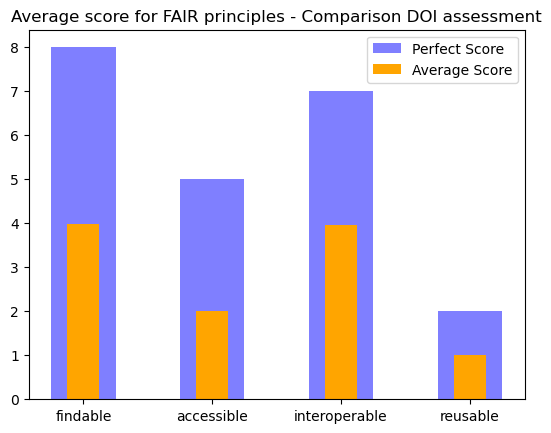

In [69]:
width = 0.5
perfect_scores = [8, 5, 7, 2]
actual_scores = comp_doi_df_principle['score_earned']
indices = np.arange(len(perfect_scores))

plt.bar(indices, perfect_scores, width=width, color='b', alpha=0.5, label='Perfect Score')
plt.bar([i for i in indices], actual_scores, width=0.5*width, color='orange', label='Average Score')
plt.xticks(indices, comp_doi_df_principle['principle'] )
plt.title("Average score for FAIR principles - Comparison DOI assessment")
plt.legend()
plt.show()

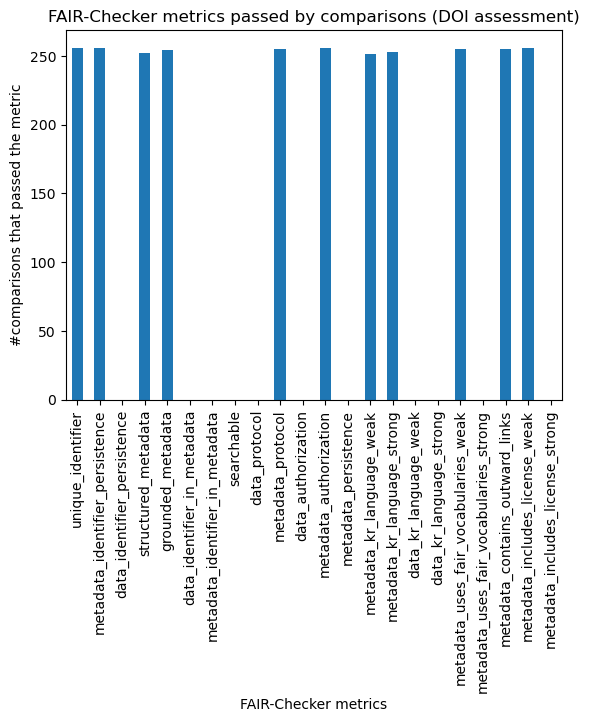

In [78]:
comp_doi_df_submetrics = comp_doi_df_assessed
comp_doi_df_submetrics = comp_doi_df_submetrics.groupby("metric").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()

comp_doi_df_submetrics["metric"] = pd.Categorical(comp_doi_df_submetrics["metric"], metrics_ordered)
comp_doi_df_submetrics = comp_doi_df_submetrics.sort_values("metric")

comp_doi_df_submetrics["score_earned"].plot(kind="bar")
locs, labels = plt.xticks()
plt.xticks(locs, metrics_ordered)
plt.title("FAIR-Checker metrics passed by comparisons (DOI assessment)")
plt.ylabel("#comparisons that passed the metric")
plt.xlabel("FAIR-Checker metrics")
plt.show()

## Comparisons via ORKG resource URL

# Resources